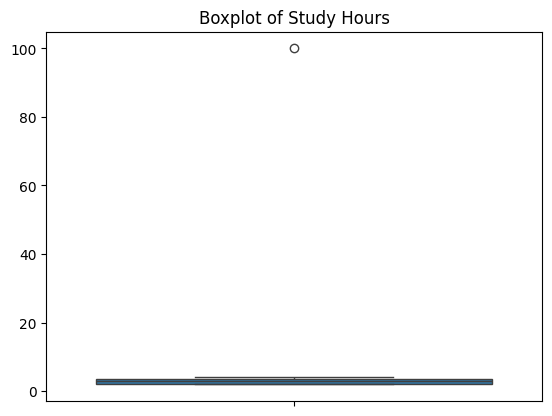

In [1]:
# One-Hot Encoding & Outlier Detection
# Part A: Outliers Handling using Boxplot
# 1. Create a boxplot of the following data using Seaborn: Study_Hours = [2, 3, 2, 4, 2, 100, 3] Task: Identify the outlier from the plot.

import seaborn as sns
import matplotlib.pyplot as plt

study_hours = [2, 3, 2, 4, 2, 100, 3]
sns.boxplot(data=study_hours)
plt.title("Boxplot of Study Hours")
plt.show()


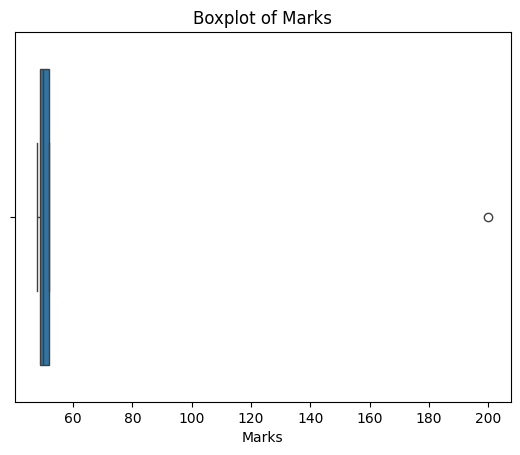

Outliers:
   Name  Marks
4    E    200


In [2]:
# 2. Load the following dataset into a DataFrame and plot a boxplot for the column 'Marks': data = {"Name": ["A", "B", "C", "D", "E"], "Marks": [50, 52, 49, 48, 200]} Task: Write code to find out if any outlier exists in the 'Marks' column.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {"Name": ["A", "B", "C", "D", "E"], "Marks": [50, 52, 49, 48, 200]}
df = pd.DataFrame(data)

sns.boxplot(x=df["Marks"])
plt.title("Boxplot of Marks")
plt.show()

# Check for outliers using IQR
Q1 = df["Marks"].quantile(0.25)
Q3 = df["Marks"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Marks"] < lower_bound) | (df["Marks"] > upper_bound)]
print("Outliers:\n", outliers)


In [3]:
# 3. Calculate the IQR and find the upper and lower bounds for outliers in the given list: scores = [5, 6, 7, 8, 9, 10, 100] Task: Write Python code to calculate Q1, Q3, IQR, and the outlier thresholds.

import numpy as np

scores = [5, 6, 7, 8, 9, 10, 100]
Q1 = np.percentile(scores, 25)
Q3 = np.percentile(scores, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
print(f"Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")


Q1 = 6.5, Q3 = 9.5, IQR = 3.0
Lower Bound = 2.0, Upper Bound = 14.0


In [4]:
# 4. Remove outliers from the following dataset using IQR logic and return the clean data: df = pd.DataFrame({'Values': [10, 12, 11, 10, 13, 200]}) Task: Drop the outlier(s) from the DataFrame.

df = pd.DataFrame({'Values': [10, 12, 11, 10, 13, 200]})
Q1 = df["Values"].quantile(0.25)
Q3 = df["Values"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

clean_df = df[(df["Values"] >= lower) & (df["Values"] <= upper)]
print("Cleaned Data:\n", clean_df)


Cleaned Data:
    Values
0      10
1      12
2      11
3      10
4      13


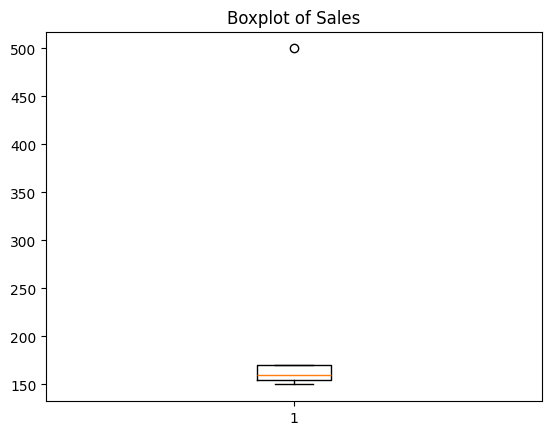

In [5]:
# 5. Plot a boxplot using matplotlib for the following column: data = {"Sales": [150, 160, 170, 155, 500]} Task: Plot and interpret whether an outlier exists.

import matplotlib.pyplot as plt

sales = [150, 160, 170, 155, 500]
plt.boxplot(sales)
plt.title("Boxplot of Sales")
plt.show()


In [6]:
# Part B: One-Hot Encoding
# 6. Apply one-hot encoding to the following 'Gender' column: df = pd.DataFrame({"Gender": ["Male", "Female", "Female", "Male"]}) Task: Use pd.get_dummies() to convert this column to numeric form.

df = pd.DataFrame({"Gender": ["Male", "Female", "Female", "Male"]})
encoded_df = pd.get_dummies(df, columns=["Gender"])
print(encoded_df)


   Gender_Female  Gender_Male
0          False         True
1           True        False
2           True        False
3          False         True


In [7]:
# 7. One-hot encode the 'City' column and drop the first dummy variable: df = pd.DataFrame({"City": ["Delhi", "Mumbai", "Kolkata", "Mumbai"]}) Task: Use pd.get_dummies(..., drop_first=True).

df = pd.DataFrame({"City": ["Delhi", "Mumbai", "Kolkata", "Mumbai"]})
encoded_df = pd.get_dummies(df, columns=["City"], drop_first=True)
print(encoded_df)


   City_Kolkata  City_Mumbai
0         False        False
1         False         True
2          True        False
3         False         True


In [8]:
# 8. Given the following DataFrame, encode both 'Gender' and 'Department': df = pd.DataFrame({"Gender": ["M", "F", "M", "F"], "Department": ["IT", "HR", "IT", "Finance"]}) Task: Apply one-hot encoding on both columns.

df = pd.DataFrame({
    "Gender": ["M", "F", "M", "F"],
    "Department": ["IT", "HR", "IT", "Finance"]
})
encoded_df = pd.get_dummies(df, columns=["Gender", "Department"])
print(encoded_df)


   Gender_F  Gender_M  Department_Finance  Department_HR  Department_IT
0     False      True               False          False           True
1      True     False               False           True          False
2     False      True               False          False           True
3      True     False                True          False          False


In [9]:
# 9. Create one-hot encoding for this DataFrame and display the result: df = pd.DataFrame({"Name": ["A", "B", "C"], "Color": ["Red", "Green", "Blue"]}) Task: Add the encoded columns and remove the original.

df = pd.DataFrame({"Name": ["A", "B", "C"], "Color": ["Red", "Green", "Blue"]})
encoded = pd.get_dummies(df, columns=["Color"])
print(encoded)


  Name  Color_Blue  Color_Green  Color_Red
0    A       False        False       True
1    B       False         True      False
2    C        True        False      False


In [10]:
# 10. Explain what happens when drop_first=True in pd.get_dummies() by writing code and showing output: df = pd.DataFrame({"Category": ["A", "B", "A", "C"]}) Task: Compare one-hot encoding with drop_first=False and drop_first=True.

df = pd.DataFrame({"Category": ["A", "B", "A", "C"]})

# drop_first=False
print("Without drop_first:\n", pd.get_dummies(df, columns=["Category"]))

# drop_first=True
print("\nWith drop_first:\n", pd.get_dummies(df, columns=["Category"], drop_first=True))


Without drop_first:
    Category_A  Category_B  Category_C
0        True       False       False
1       False        True       False
2        True       False       False
3       False       False        True

With drop_first:
    Category_B  Category_C
0       False       False
1        True       False
2       False       False
3       False        True
